In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import csv
import pickle

In [2]:
with open('/home/jonathan/tesis/3er_avance/columns_names2.pickle', "rb") as file:   
    columns_names = pickle.load(file)

names = list(columns_names)
lista=["ds"]
    
for trayectos in names:    
    x=trayectos.startswith("2807901")    
    if x==True:                         
        lista.append(trayectos)

df = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
#df.head(10)

In [3]:
#df2.iloc[:,100:1000]
df.shape

(768, 186)

In [4]:
df.index.freq = df.index.inferred_freq
df_Dia = df.resample('24H').sum()
#df_Dia.index
#df_Dia.dtypes
#df_Dia.tail(25)
#df_Dia.iloc[:,102:186]

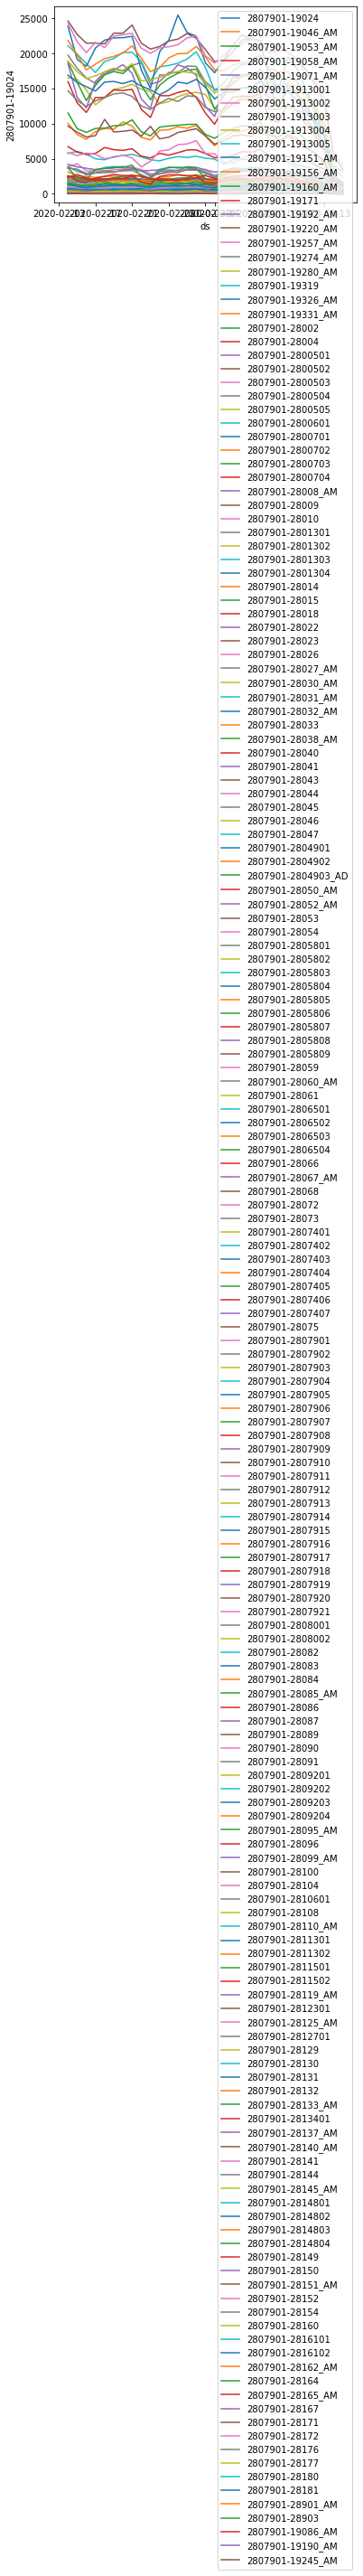

In [5]:
for trayecto in lista:
    x=trayecto.startswith("2807901")
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-02-14':'2020-03-15'],legend='brief',label=trayecto)        

In [6]:
mean_df = df_Dia.mean()
mean_dict = mean_df.to_dict()
main_lines = list(dict.keys(dict(filter(lambda x: x[1] > 15000, mean_dict.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000
print(main_lines)

['2807901-2807904', '2807901-2807905', '2807901-2807906', '2807901-2807910', '2807901-2807911', '2807901-2807913']


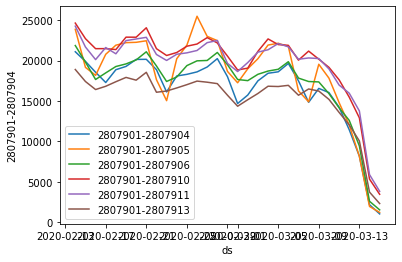

In [7]:
for trayecto in main_lines:
    x=trayecto.startswith("2807901")
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-02-14':'2020-03-15'],legend='brief',label=trayecto)        

In [8]:
main_lines.insert(0,"ds")
df_main_lines = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines)

df_main_lines['Año'] = df_main_lines.index.year                                
df_main_lines['Mes'] = df_main_lines.index.month                               
df_main_lines['Dia'] = df_main_lines.index.day_name()
df_main_lines['ID_Dia'] = df_main_lines.index.dayofweek
df_main_lines['Hora'] = df_main_lines.index.hour
df_main_lines['WeekNo'] = df_main_lines.index.isocalendar().week
#df_main_lines.sample(8, random_state=0)  
df_main_lines.shape

(768, 12)

In [9]:
print(main_lines)

['ds', '2807901-2807904', '2807901-2807905', '2807901-2807906', '2807901-2807910', '2807901-2807911', '2807901-2807913']


In [21]:
data1=df_main_lines.loc['2020-02-14':'2020-03-15']
cont=1
for line in main_lines:    
    if line=="ds":        
        continue    
        
    globals()[f"table1_{cont}"] = pd.pivot_table(data1, values=line, index=['ID_Dia','Dia','Hora'],
                        columns=['WeekNo'],fill_value=0)
    cont=cont+1
    

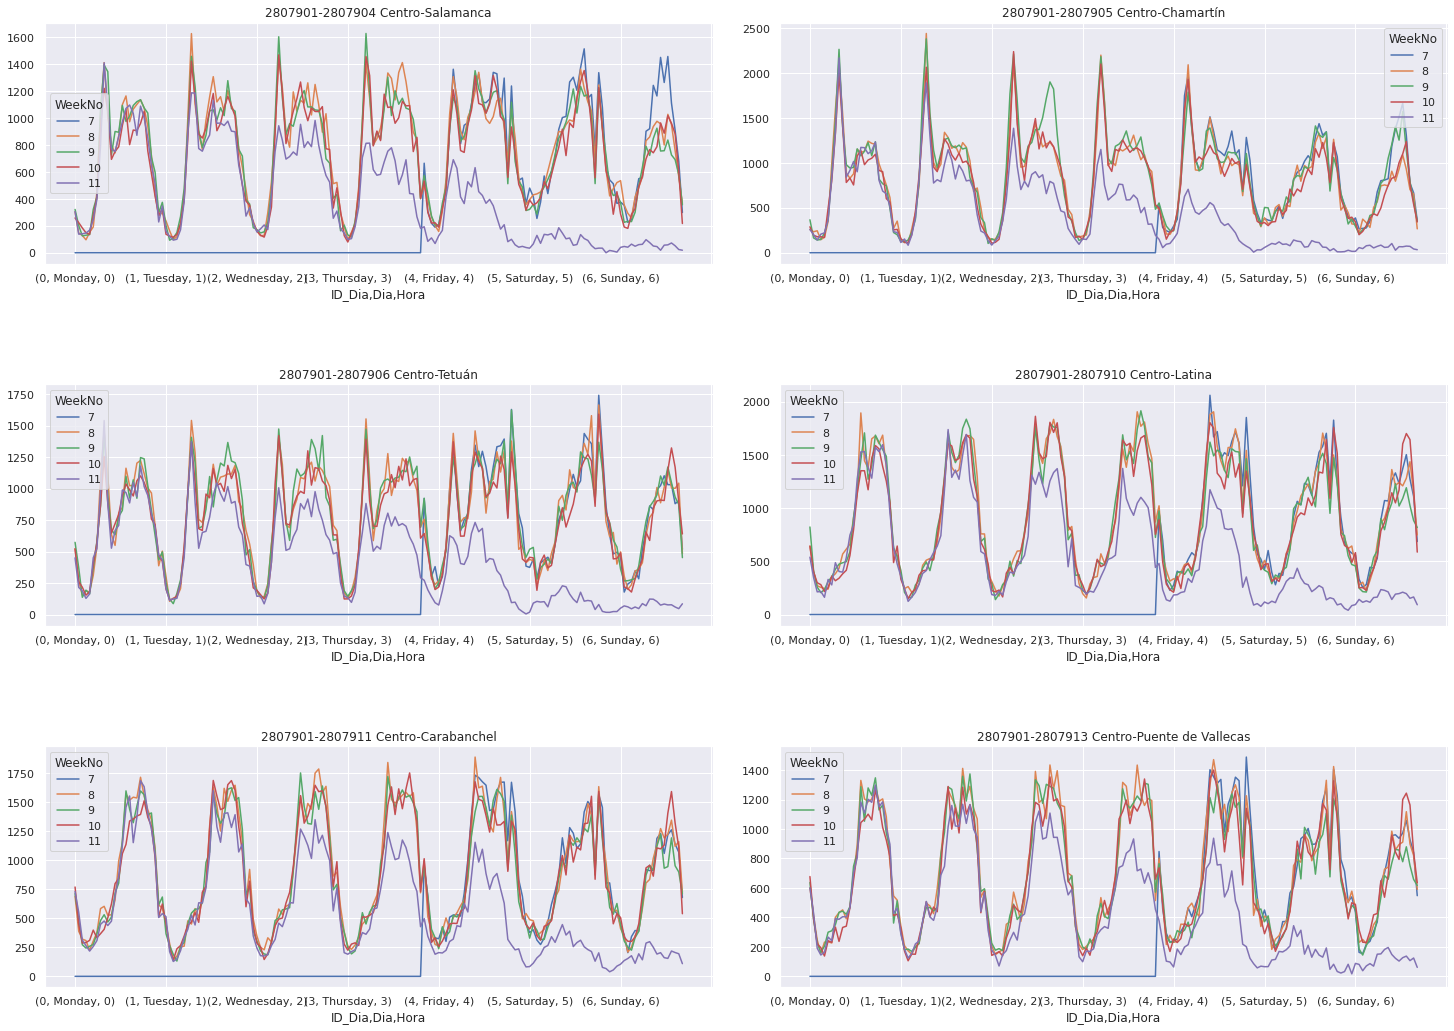

In [61]:
sb.set(rc = {'figure.figsize':(15,8)})
rows = round((len(main_lines)-1)/2)
cont2=1
ax=0
for line in main_lines:
    origen = line[0:7]
    destino = line[8:15]
    lines_names = {"2807901":"Centro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807910":"Latina","2807911":"Carabanchel","2807913":"Puente de Vallecas",}
    
    if line=="ds":        
        fig, axes = plt.subplots(nrows=rows, ncols=2)
        ax_list = fig.axes
        plt.subplots_adjust(left=0.001, bottom=None, right=1.3, top=1.8, wspace=0.1, hspace=0.5)
        continue
    globals()[f"table1_{cont2}"].plot(ax=ax_list[ax]); ax_list[ax].set_title(line+" "+lines_names[origen]+"-"+lines_names[destino])
    cont2=cont2+1   
    ax=ax+1
